# Analysis on filesystem variant for Big Data worklaod

## Objectives

This experiment aims at calibrating an analysing the different tradeoffs between HPC traditional filesystem, the parallel file system (PFS), and the Big Data traditionnal file system, the Distributed file system (DFS), regarding IO interferences for a Big Data workload.

## Models

### Platforms

The platform is a Simgrid platform where disks where added to each host with the [platforms/add_disks.py] for the DFS variant, and one disks for PFS. A disk in the Batsim platforms is a simple host with no computing power.

### Application

It is based on smulations done with Batsim. The Big Data application job model was generated from Spark traces using the following notebook: [workload_generation/Generate_job_model_from_spark_traces.ipynb](workload_generation/Generate_job_model_from_spark_traces.ipynb).

### Distributed file system

The distribued system model is hold by the [Pybatsim bebida scheduler](https://gitlab.inria.fr/batsim/pybatsim/blob/master/schedulers/schedBebida.py). TODO: Explain the model

### Parallel file system

TODO: explain PFS model



## Parameters

The parameters that we could work with are:

- platforme:
  - Number of resources:
    - number of core
    - number of host
    - number of core per host
  - For DFS:
    - disk bandwitdh
    - disk latency
    - disk interfence model
    - number of disk per node
  - For PFS:
    - 

In [1]:
%matplotlib inline
from evalys.jobset import JobSet
import evalys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
js = {}
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.figsize'] = 15, 13.5

In [3]:
variants = ['no-io', 'pfs', 'dfs']#, 'bebida-dfs']
#variants = ['no-io-one-job',
#              'pfs-one-job', 
#              'dfs-one-job']
#variants = ['graphene-no-io']


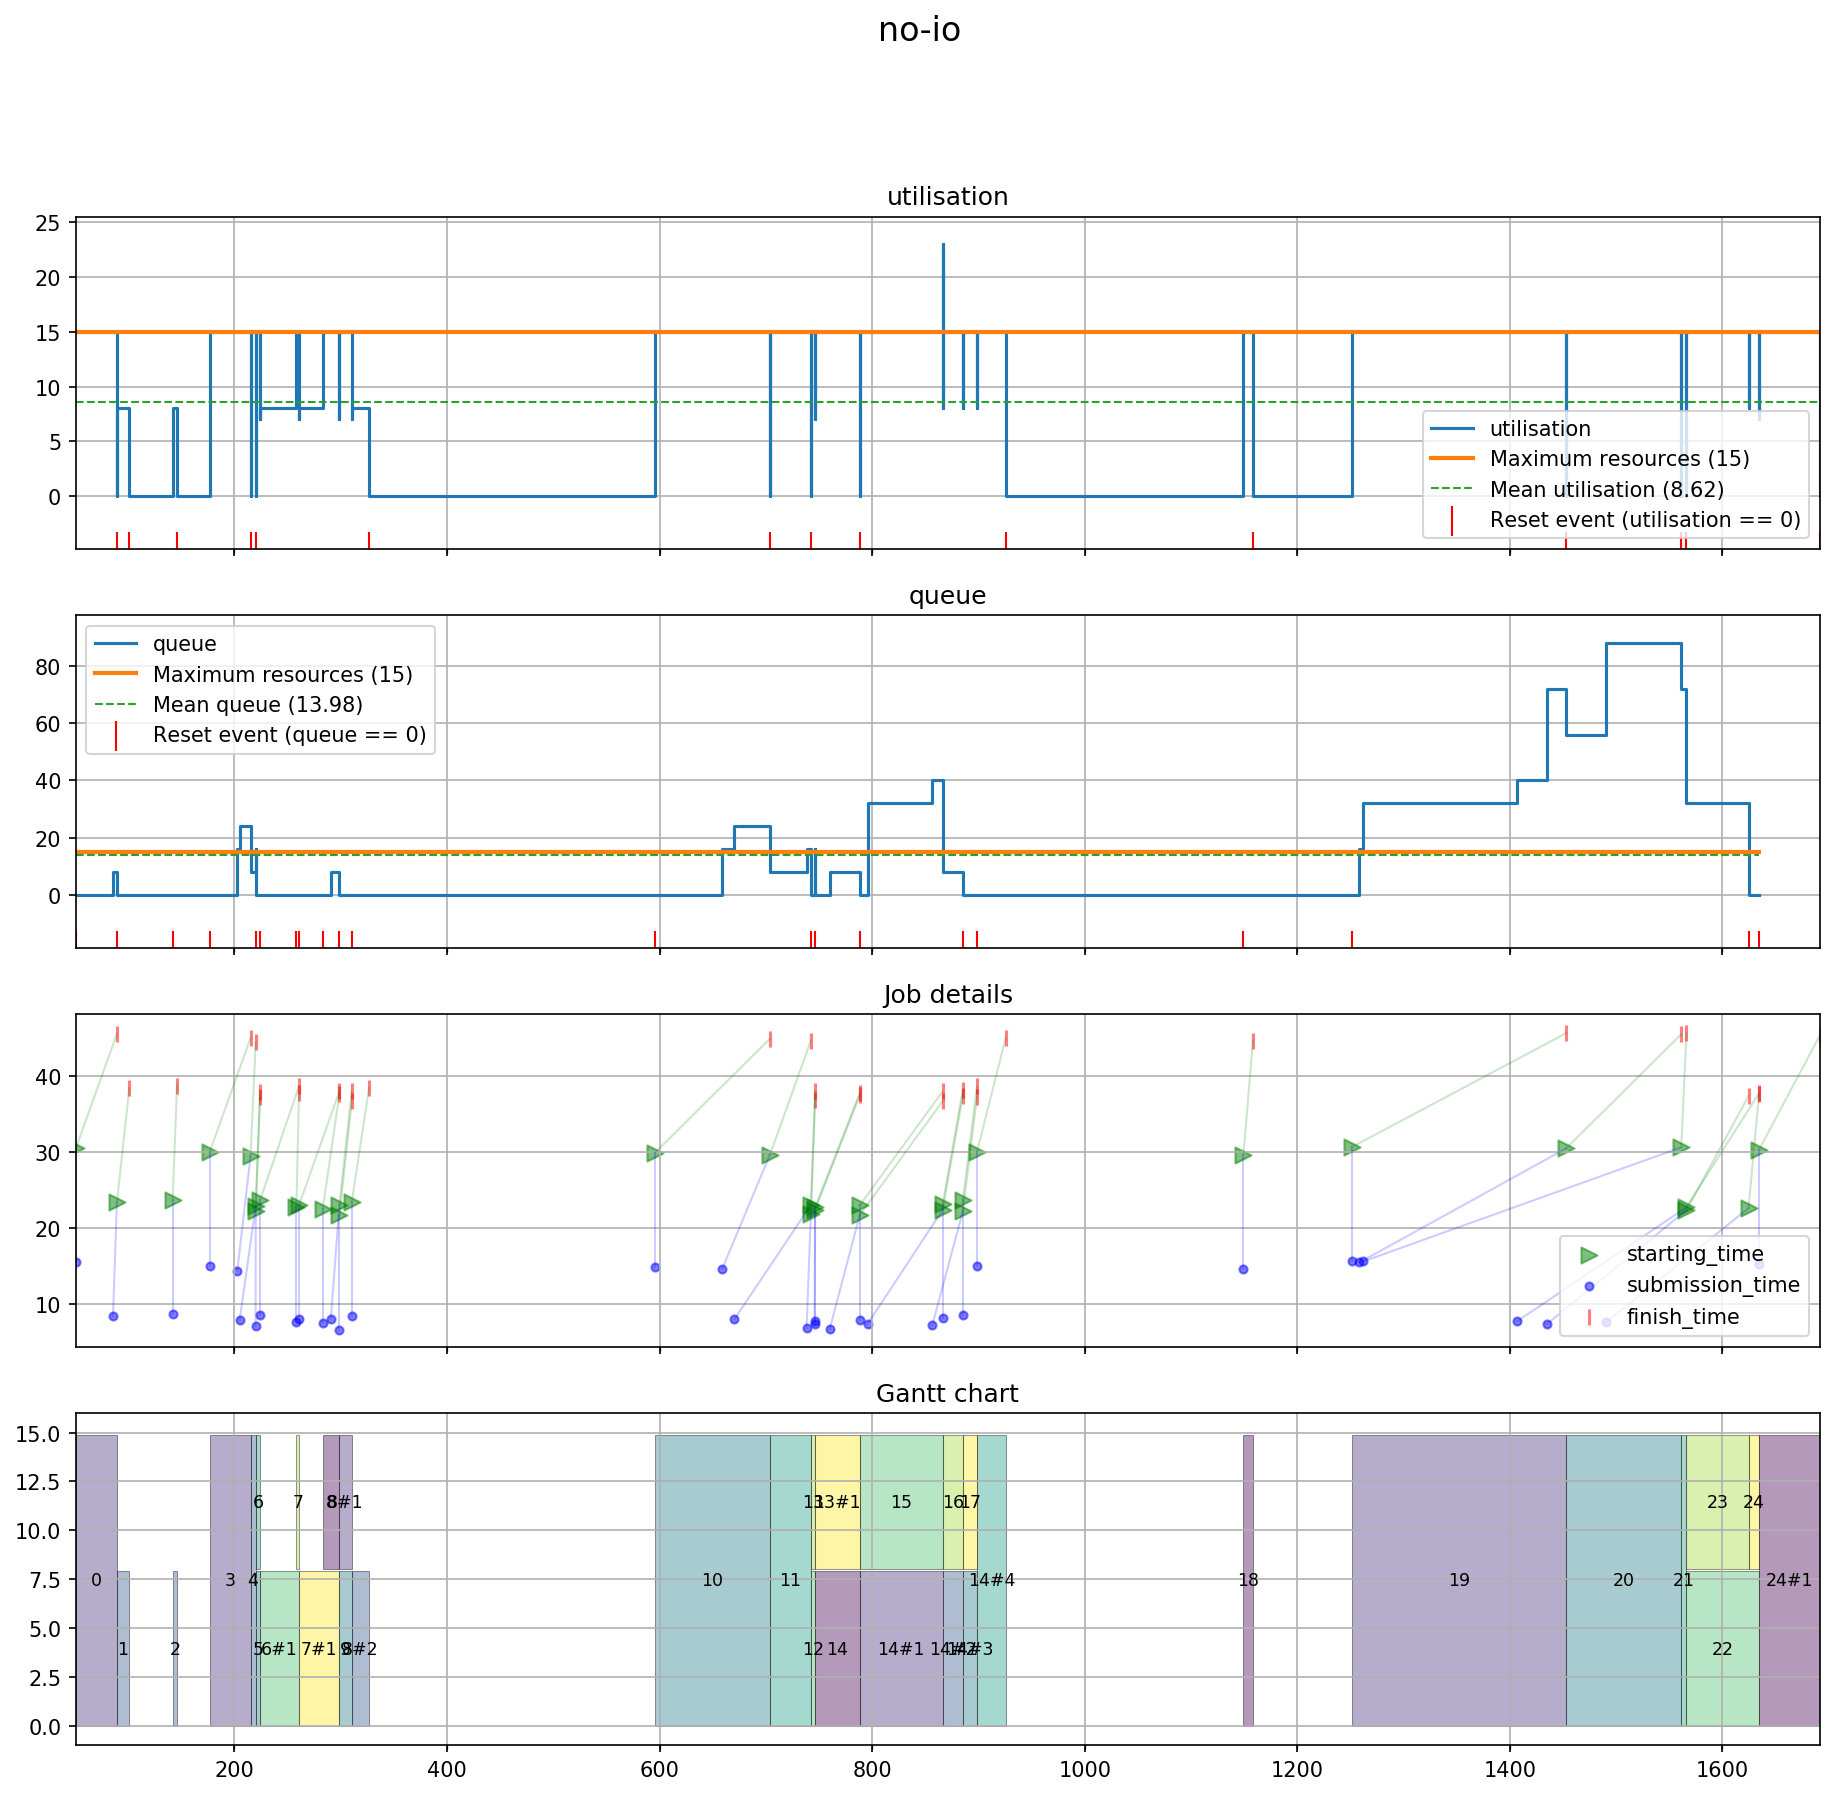

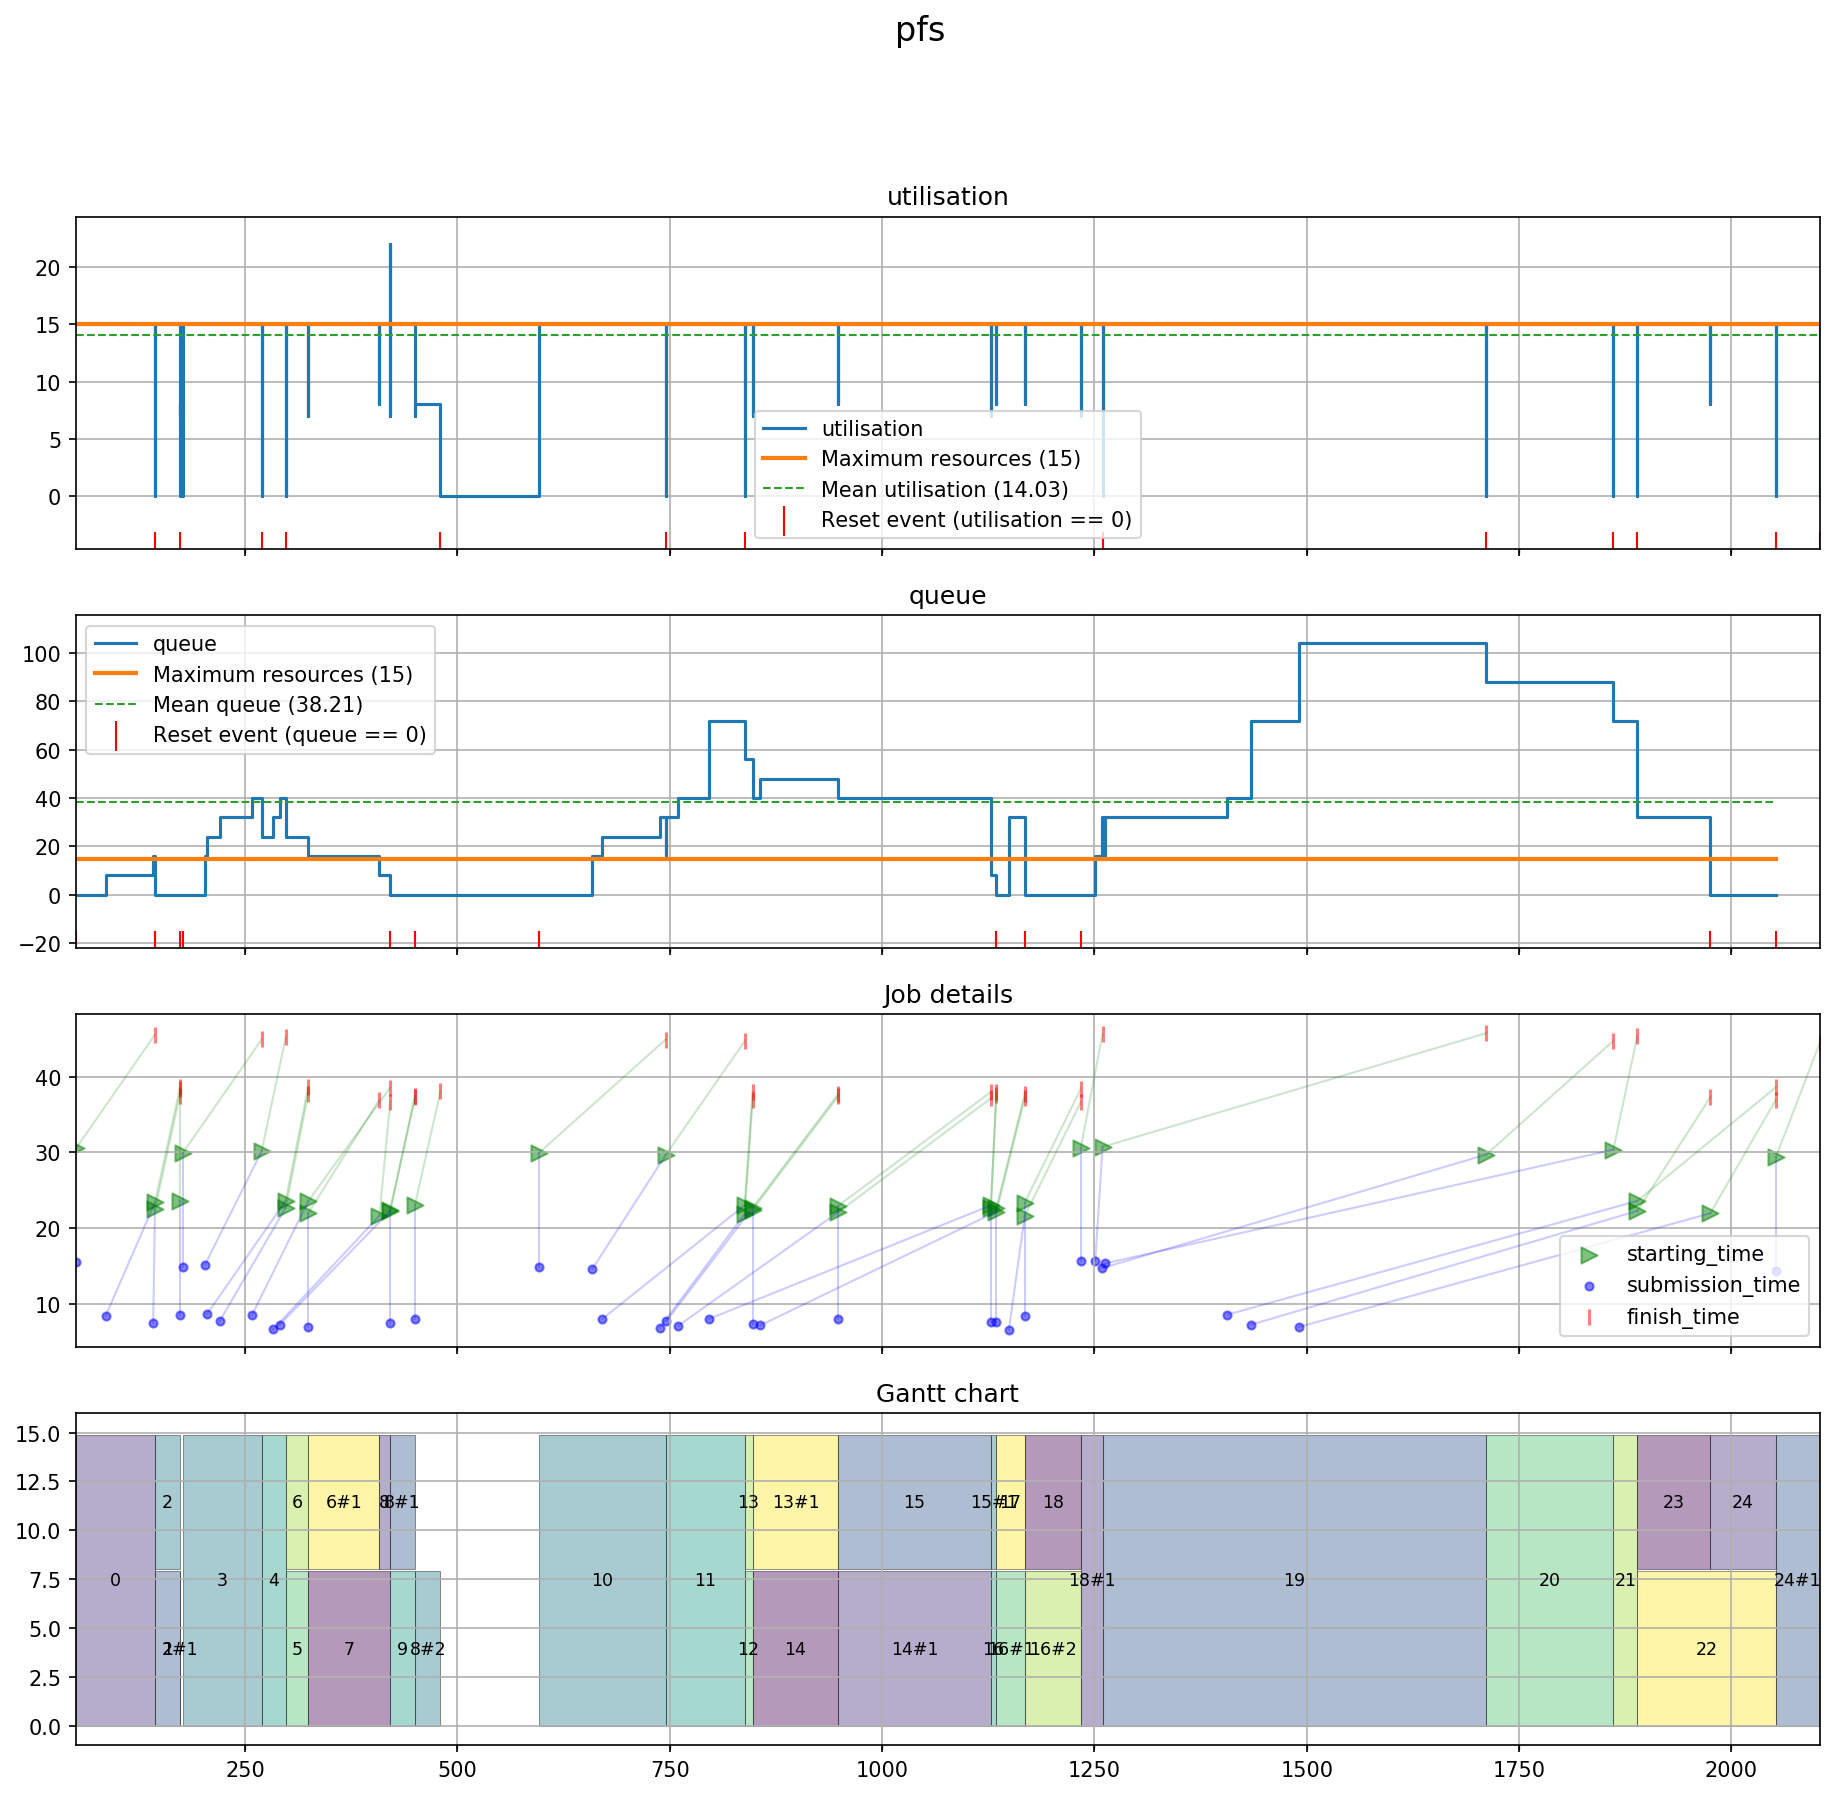

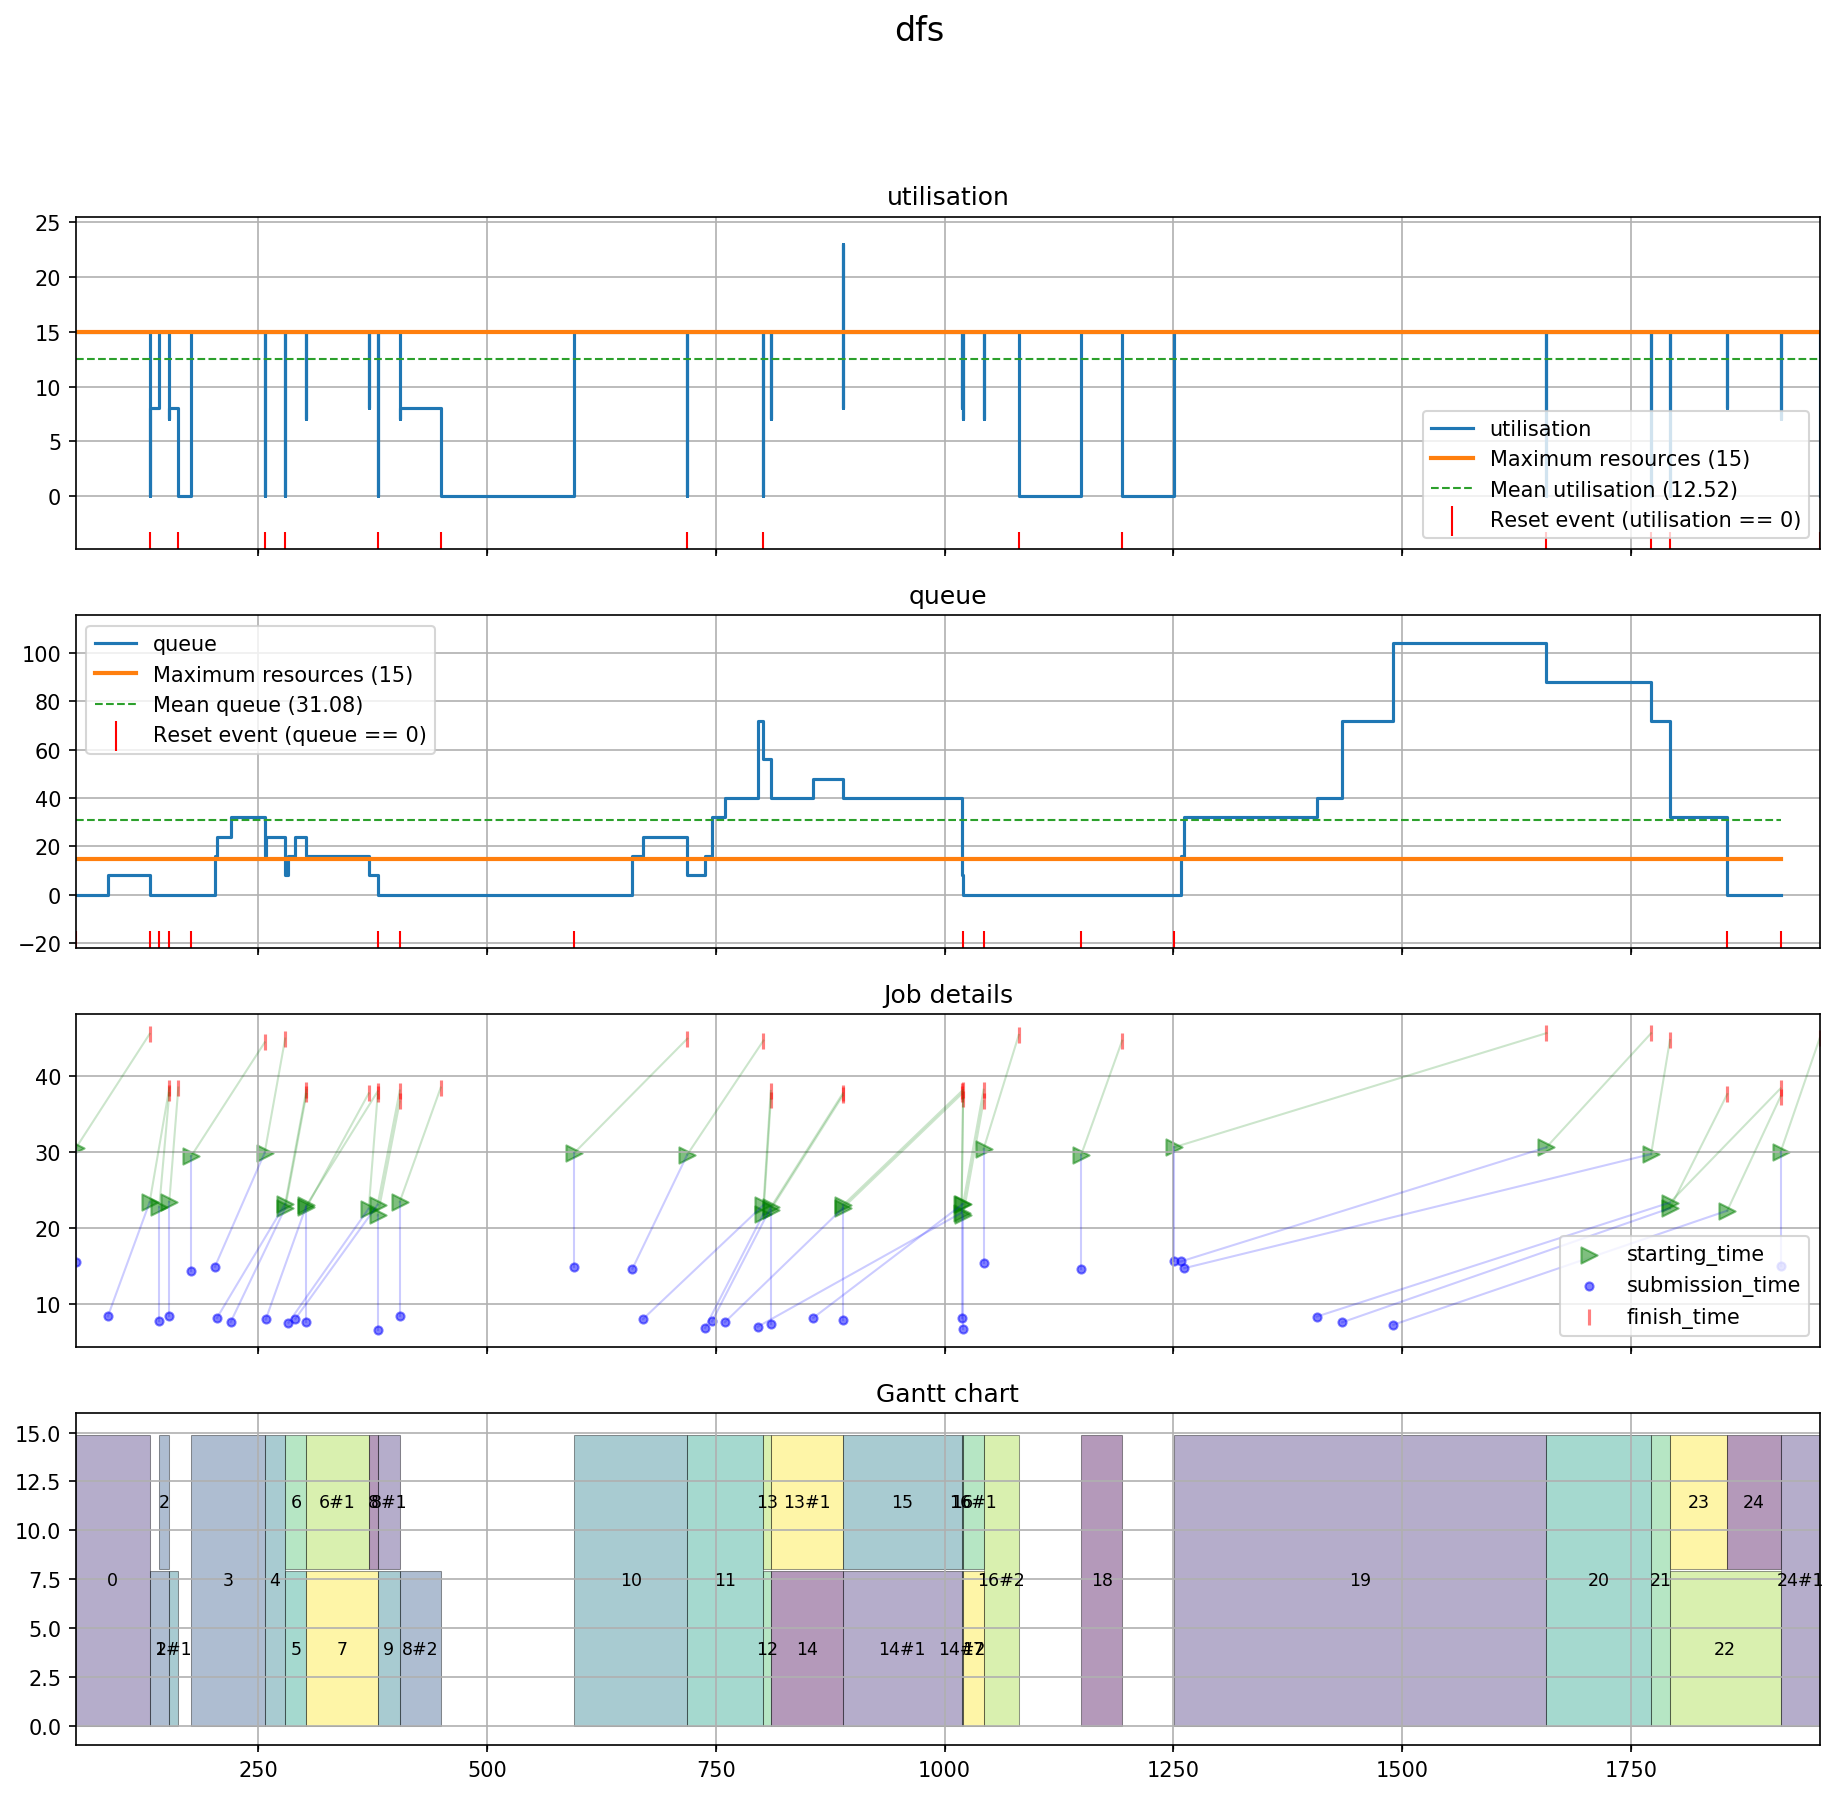

In [4]:
for variant in variants:
    js[variant] = JobSet.from_csv(f"./results/{variant}_jobs.csv")
    
    js[variant].plot(with_details=True, title=variant)

In [5]:
for label, j in js.items():
    j.df["parent_job"] = j.df["jobID"].apply(lambda x: int(x.split('#')[0]))

In [6]:
import pandas
exec_time = []
for j in js.values():
    exec_time.append(j.df.groupby(by="parent_job")['execution_time'].sum())
exec_time_df = pandas.concat(exec_time, keys=variants)
exec_time_df.reset_index(name='execution_time')

level_0  parent_job  execution_time
0    no-io           0       38.516903
1    no-io           1       11.666080
2    no-io           2        4.103089
3    no-io           3       38.516903
4    no-io           4        4.864169
5    no-io           5        4.103089
6    no-io           6       40.696553
7    no-io           7       40.487889
8    no-io           8       43.595267
9    no-io           9       11.666080
10   no-io          10      108.312174
11   no-io          11       38.516903
12   no-io          12        3.994521
13   no-io          13       45.924162
14   no-io          14      179.366744
15   no-io          15       78.040683
16   no-io          16       18.956627
17   no-io          17       13.332663
18   no-io          18        8.846426
19   no-io          19      201.893596
20   no-io          20      108.312174
21   no-io          21        4.864169
22   no-io          22       68.285597
23   no-io          23       58.412980
24   no-io          24       66.975543
25     pfs           0       92.995721
26     pfs           1       29.193393
27     pfs           2       29.664631
28     pfs           3       92.995721
29     pfs           4       28.233296
..     ...         ...             ...
45     pfs          20      149.598318
46     pfs          21       28.233296
47     pfs          22      163.228219
48     pfs          23       85.927766
49     pfs          24      128.798612
50     dfs           0       80.530857
51     dfs           1       21.474946
52     dfs           2       20.867603
53     dfs           3       80.530857
54     dfs           4       22.369731
55     dfs           5       23.264516
56     dfs           6       91.268434
57     dfs           7       77.846502
58     dfs           8       78.741445
59     dfs           9       24.159301
60     dfs          10      123.368682
61     dfs          11       83.215211
62     dfs          12        8.053174
63     dfs          13       86.794509
64     dfs          14      210.163349
65     dfs          15      129.744134
66     dfs          16       62.523518
67     dfs          17       22.369731
68     dfs          18       44.739353
69     dfs          19      406.681366
70     dfs          20      114.420833
71     dfs          21       20.580162
72     dfs          22      120.796285
73     dfs          23       62.635050
74     dfs          24      100.999280

[75 rows x 3 columns]

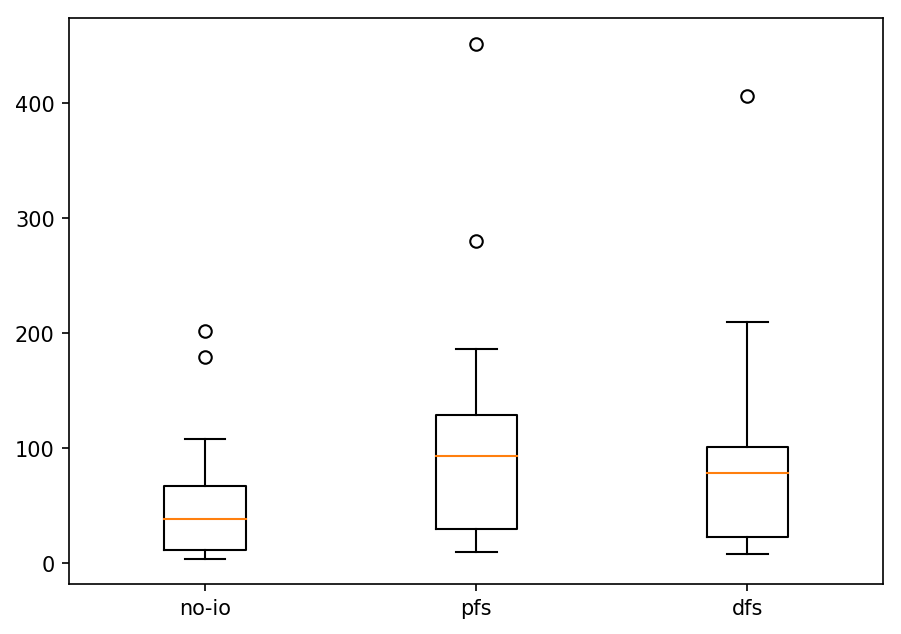

In [7]:

matplotlib.rcParams['figure.figsize'] = 7,5
ax = plt.gca()

fig = ax.boxplot(exec_time, labels=[label for label in js.keys()] )

In [8]:
exec_time_df.groupby(level=0).describe()
  

count        mean        std       min        25%        50%  \
dfs     25.0   84.725553  82.005942  8.053174  23.264516  78.741445   
no-io   25.0   49.690039  52.464394  3.994521  11.666080  38.516903   
pfs     25.0  107.003734  95.100495  9.506469  29.664631  92.995721   

              75%         max  
dfs    100.999280  406.681366  
no-io   66.975543  201.893596  
pfs    128.798612  451.808864

## Mean difference beween PFS and DFS

No handles with labels found to put in legend.


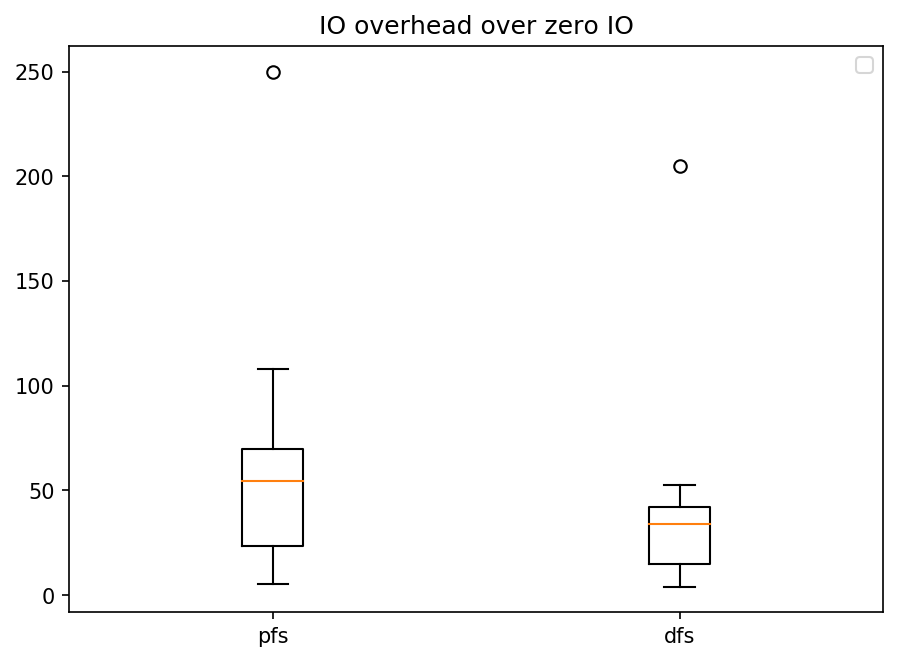

In [9]:
pfs_overhead = exec_time_df["pfs"] - exec_time_df["no-io"]
dfs_overhead = exec_time_df["dfs"] - exec_time_df["no-io"]
ax = plt.gca()

ax.boxplot([pfs_overhead, dfs_overhead], labels=["pfs", "dfs"])
ax.yaxis.legend = "in seconds"
ax.set_title("IO overhead over zero IO")

plt.legend()

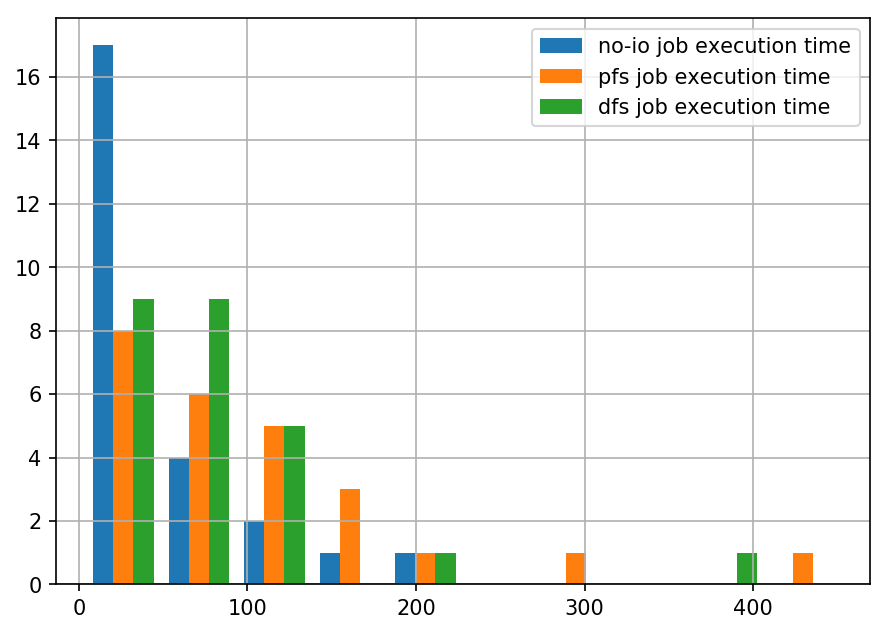

In [10]:
ax = plt.gca()
plt.grid()
ax.hist(exec_time, bins=10, label=[label + " job execution time" for label in js.keys()] )

plt.legend()

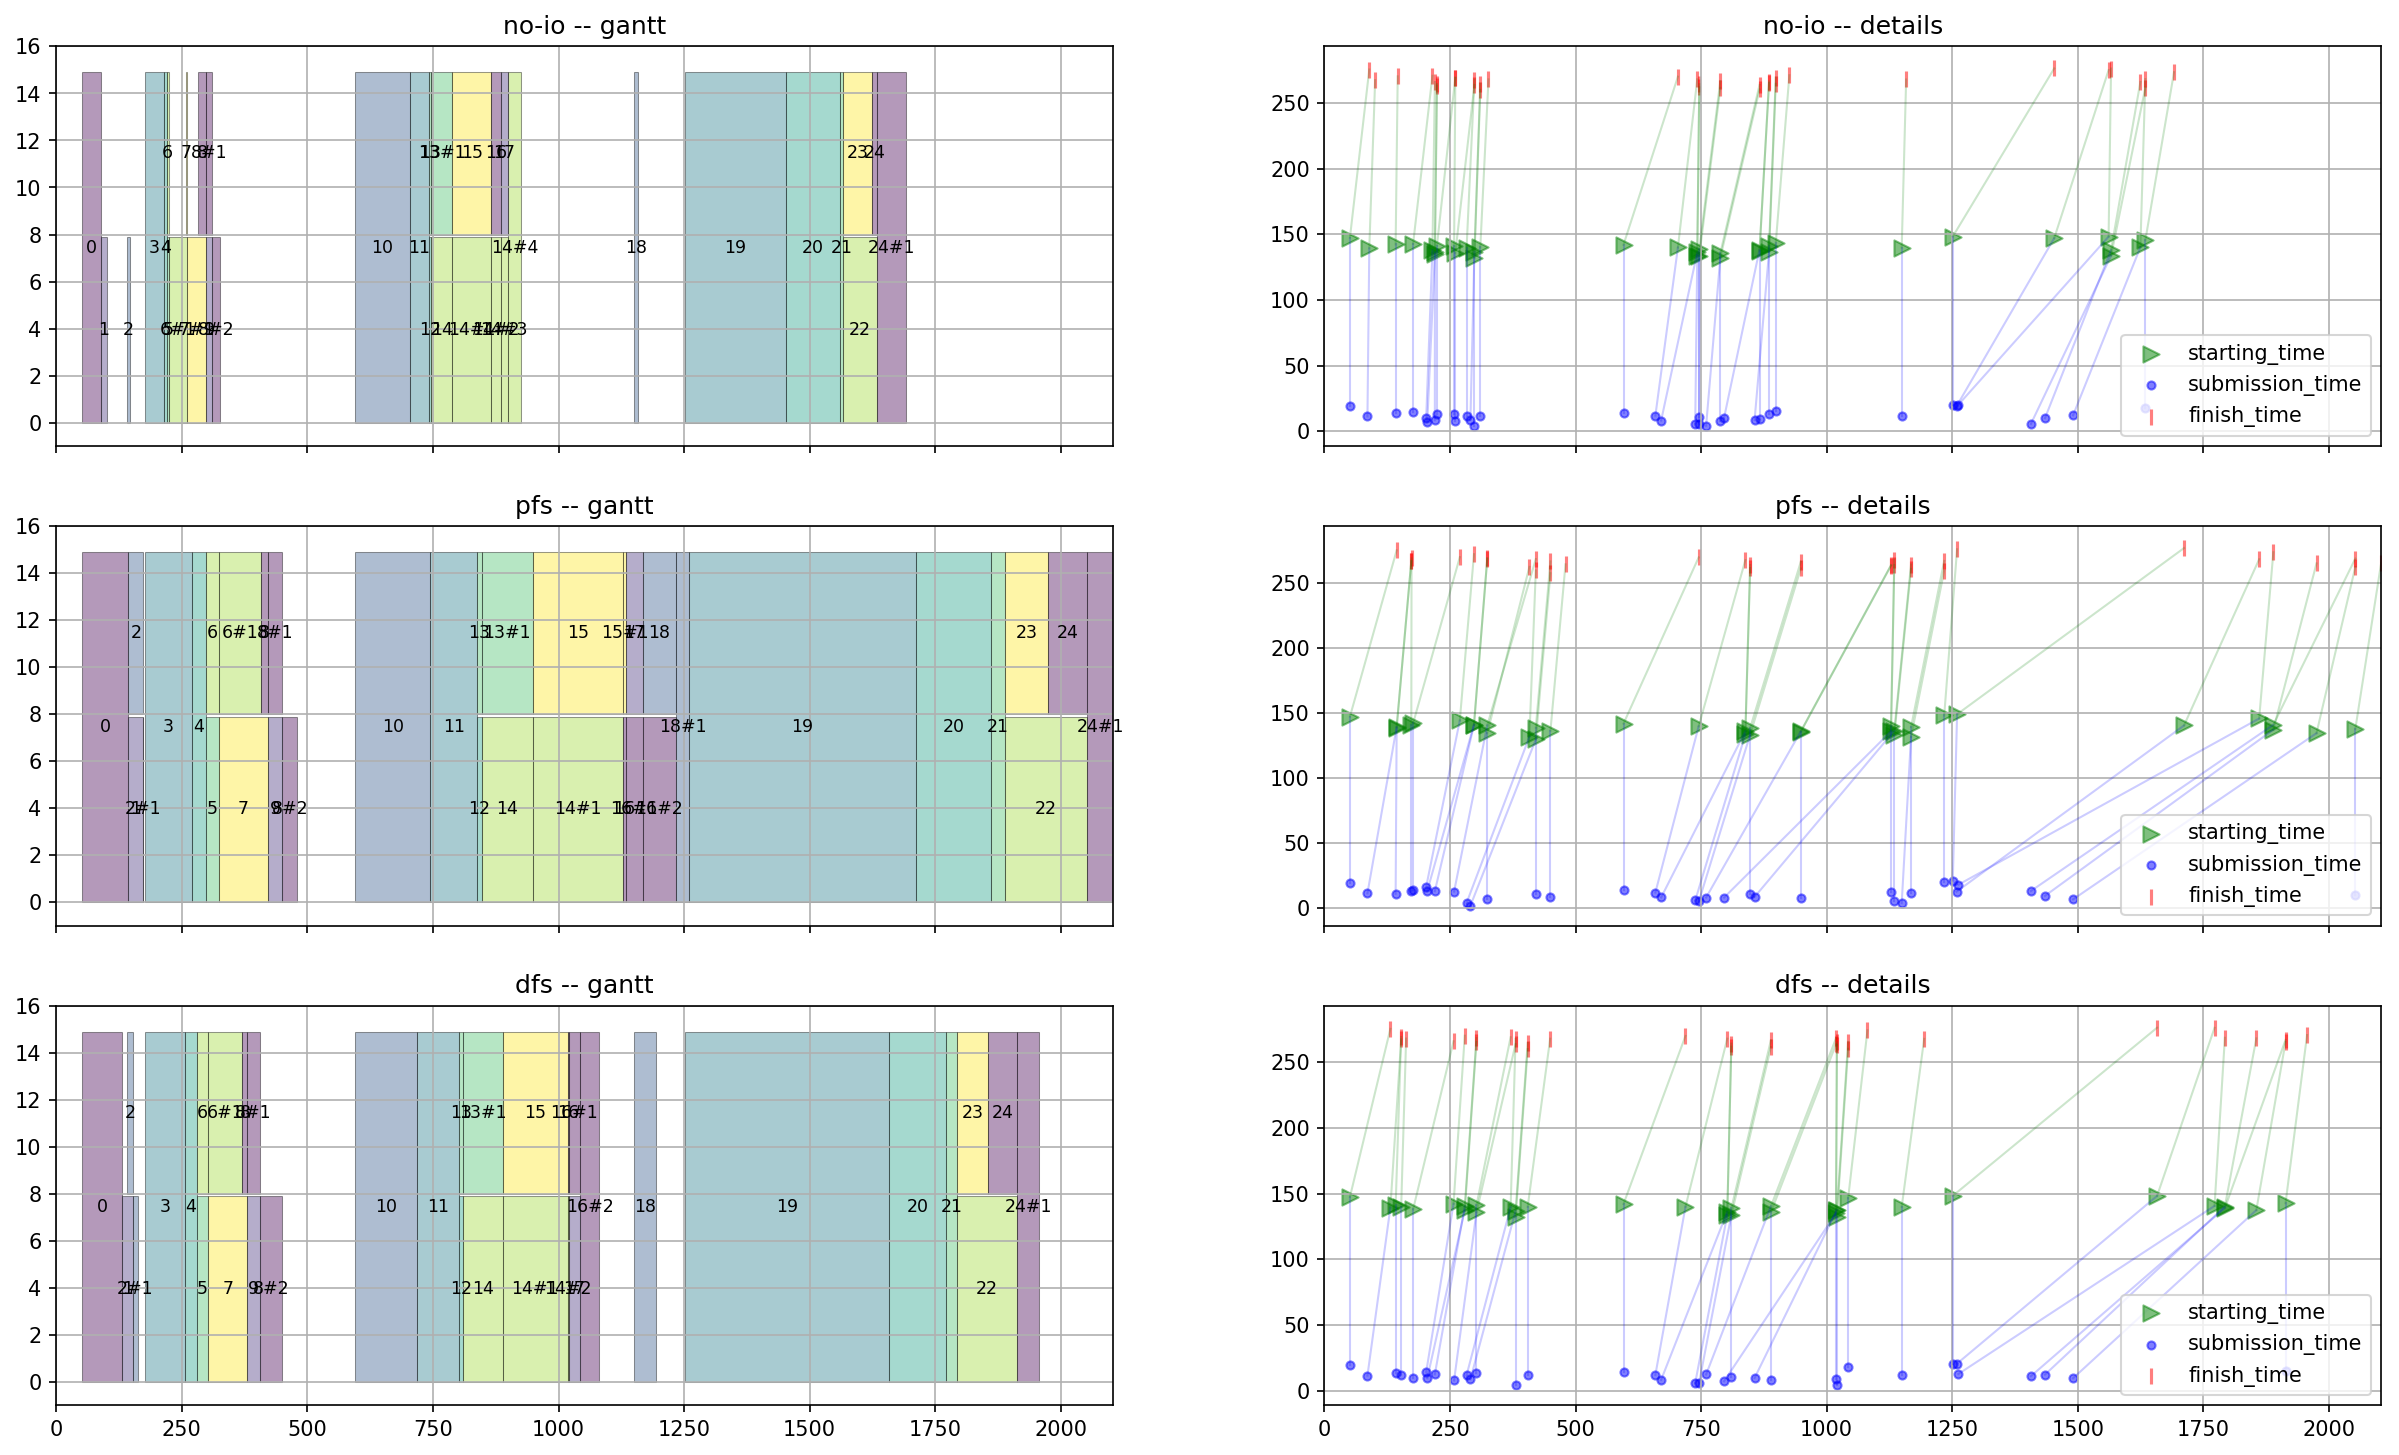

In [11]:
import matplotlib.pyplot as plt
from evalys import visu

matplotlib.rcParams['figure.figsize'] = 20, 12
matplotlib.rcParams['figure.dpi']= 150

for label, j in js.items():
    j.df["parent_job"] = j.df["jobID"].apply(lambda x: x.split('#')[0])

palette = evalys.visu.generate_colorblind_friendly_palette()
def color_func(job, palette):
    return palette[int(job["parent_job"]) % len(palette)]

fig, axes = plt.subplots(nrows=len(variants), ncols=2, sharex=True)

for i, variant in enumerate(variants):
    visu.plot_gantt(js[variant], ax=axes[i][0], color_function=color_func, title=variant + " -- gantt")
    visu.plot_job_details(js[variant].df, ax=axes[i][1], size=128, title=variant + " -- details")

# Get max values of all graphs to set the x limit properly
max_finish_time = [max(js[variant].df.finish_time) for variant in variants]
[axe.set_xlim([0, max(max_finish_time)]) for sublist in axes for axe in sublist]

pass
#plt.savefig("export.pdf")

In [12]:
!echo $PWD

/home/mmercier/Projects/bebida-on-batsim/experiments/bebida-simulation
